In [ ]:
# Import necessary libraries
# Load the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Allow inline plots in Jupyter Notebook
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6, 3)

# Load the World Happiness dataset
df = pd.read_csv('world_happiness_data.csv')


In [ ]:
# Display the data and explore
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [ ]:
# Check for missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Country - 0%
Region - 0%
Happiness Rank - 0%
Happiness Score - 0%
Standard Error - 0%
Economy (GDP per Capita) - 0%
Family - 0%
Health (Life Expectancy) - 0%
Freedom - 0%
Trust (Government Corruption) - 0%
Generosity - 0%
Dystopia Residual - 0%


In [53]:
# Check Data Types for our columns
print(df.dtypes)

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
                                  ...   
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Length: 12, dtype: object


In [85]:
# Find rows with Happiness Scores outside the range of 0 to 10
out_of_range = df[(df['Happiness Score'] < 0) | (df['Happiness Score'] > 10)]
print(out_of_range)

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []


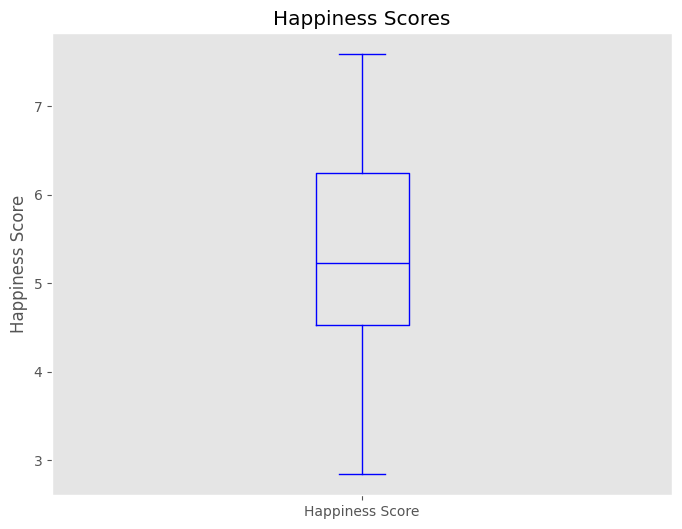

In [86]:
# Box plot for visually summarize the distribution of happiness scores, including their median, spread, and potential outliers.
df.boxplot(column=['Happiness Score'], grid=False, figsize=(8, 6), color='blue')

plt.title("Happiness Scores")
plt.ylabel("Happiness Score")
plt.show()

In [88]:
# Drop duplicates if have any
df["Country"].drop_duplicates()


0      Switzerland
1          Iceland
2          Denmark
3           Norway
4           Canada
          ...     
153         Rwanda
154          Benin
155          Syria
156        Burundi
157           Togo
Name: Country, Length: 158, dtype: object

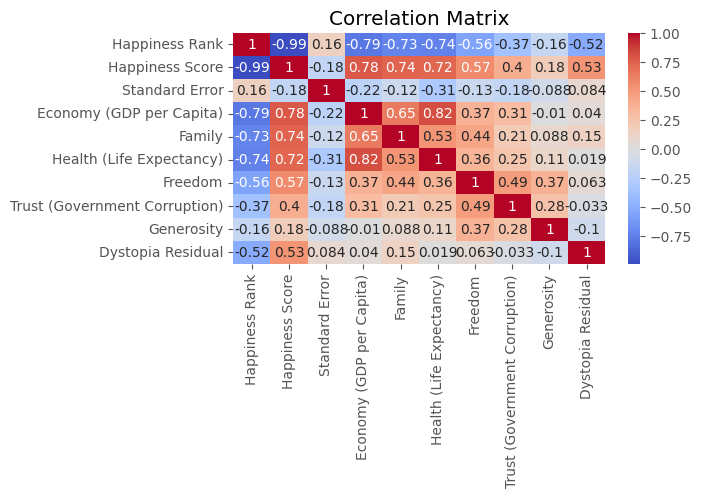

In [34]:
# Heat map for correlations between original numeric data
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

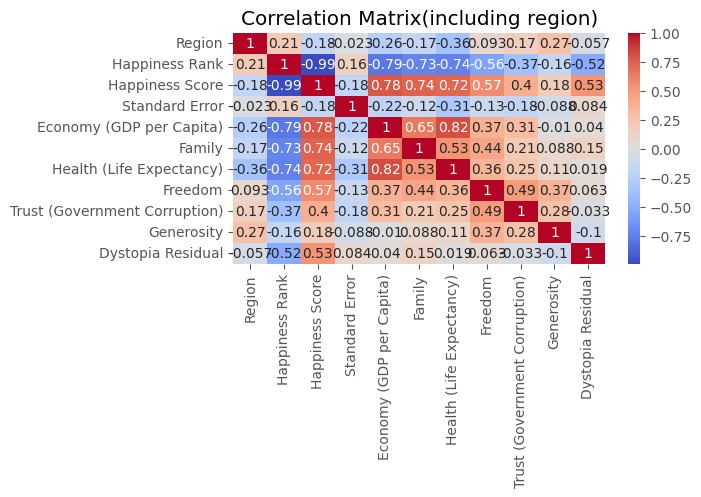

In [90]:
# Correlations inluding Region
# In the correlation analysis, "Region" is encoded numerically to explore potential relationships between geographic grouping and other happiness-related metrics like "Happiness Score," 
# "Economy (GDP per Capita)," "Health (Life Expectancy)," and "Trust (Government Corruption)."
df_new = df
for col in df_new.columns:
    if col == "Region":
        df_new[col] = df_new[col].astype("category")
        df_new[col] = df_new[col].cat.codes

# Exclude 'Country' column
df_new = df_new.drop(columns=['Country'])
corr_matrix = df_new.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix(including region)")
plt.show()

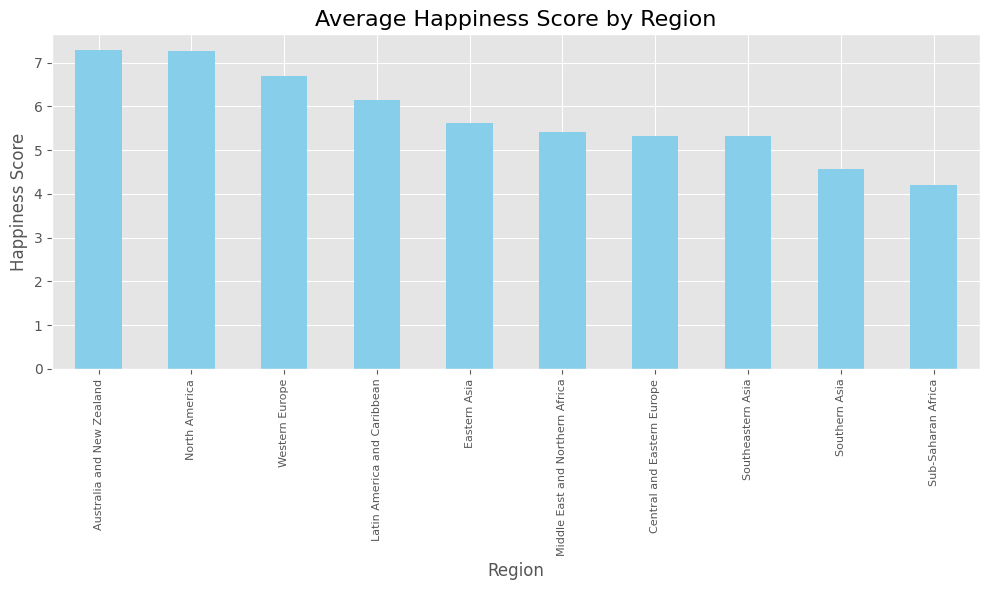

In [ ]:
# Calculate the average Happiness Score by Region
region_avg = df.groupby("Region")["Happiness Score"].mean().sort_values(ascending=False)

# Create a bar chart
region_avg.plot.bar(color='skyblue', figsize=(10, 6))

# Add titles and labels
plt.title("Average Happiness Score by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

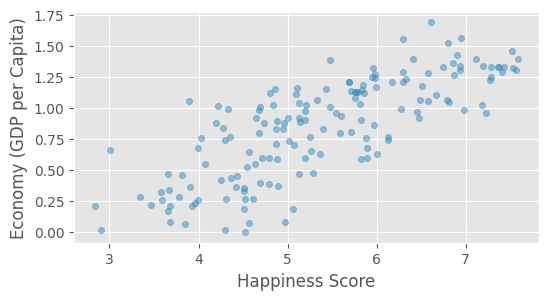

In [94]:
# Scatter plot correlation between Economy (GDP per Capita) per capita and Happiness Score

df.plot.scatter(x="Happiness Score", y="Economy (GDP per Capita)", alpha=0.5)


plt.show()

<Axes: xlabel='Happiness Score', ylabel='Family'>

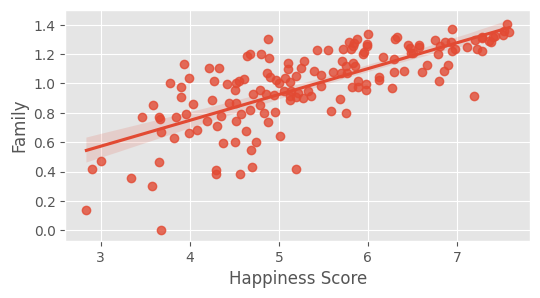

In [92]:
# regplot correlation between Family and Happiness Score

sns.regplot(x="Happiness Score", y="Family", data=df)

<Axes: xlabel='Happiness Score', ylabel='Health (Life Expectancy)'>

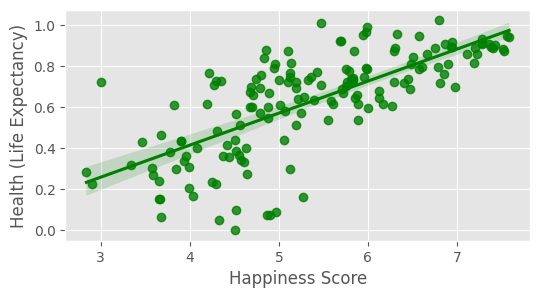

In [93]:
# regplot correlation between Health (Life Expectancy) and Happiness Score

sns.regplot(x="Happiness Score", y="Health (Life Expectancy)", data=df, color="green")

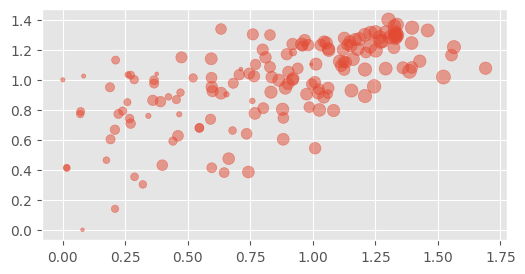

In [95]:
# Buble plot to see relationships between Economy, Family and Health

plt.scatter(df["Economy (GDP per Capita)"], df["Family"], s=df['Health (Life Expectancy)']*100, alpha=0.5)

In [98]:
# Calculates and displays all pairwise correlations between numerical columns in the dataset.
corr_mat = numeric_df.corr()
corr_pairs = corr_mat.unstack()
pd.set_option('display.max_row', 10)
corr_pairs.sort_values()

Happiness Rank                 Happiness Score                 -0.992105
Happiness Score                Happiness Rank                  -0.992105
Happiness Rank                 Economy (GDP per Capita)        -0.785267
Economy (GDP per Capita)       Happiness Rank                  -0.785267
Happiness Rank                 Health (Life Expectancy)        -0.735613
                                                                  ...   
Standard Error                 Standard Error                   1.000000
Generosity                     Generosity                       1.000000
Trust (Government Corruption)  Trust (Government Corruption)    1.000000
Freedom                        Freedom                          1.000000
Dystopia Residual              Dystopia Residual                1.000000
Length: 100, dtype: float64

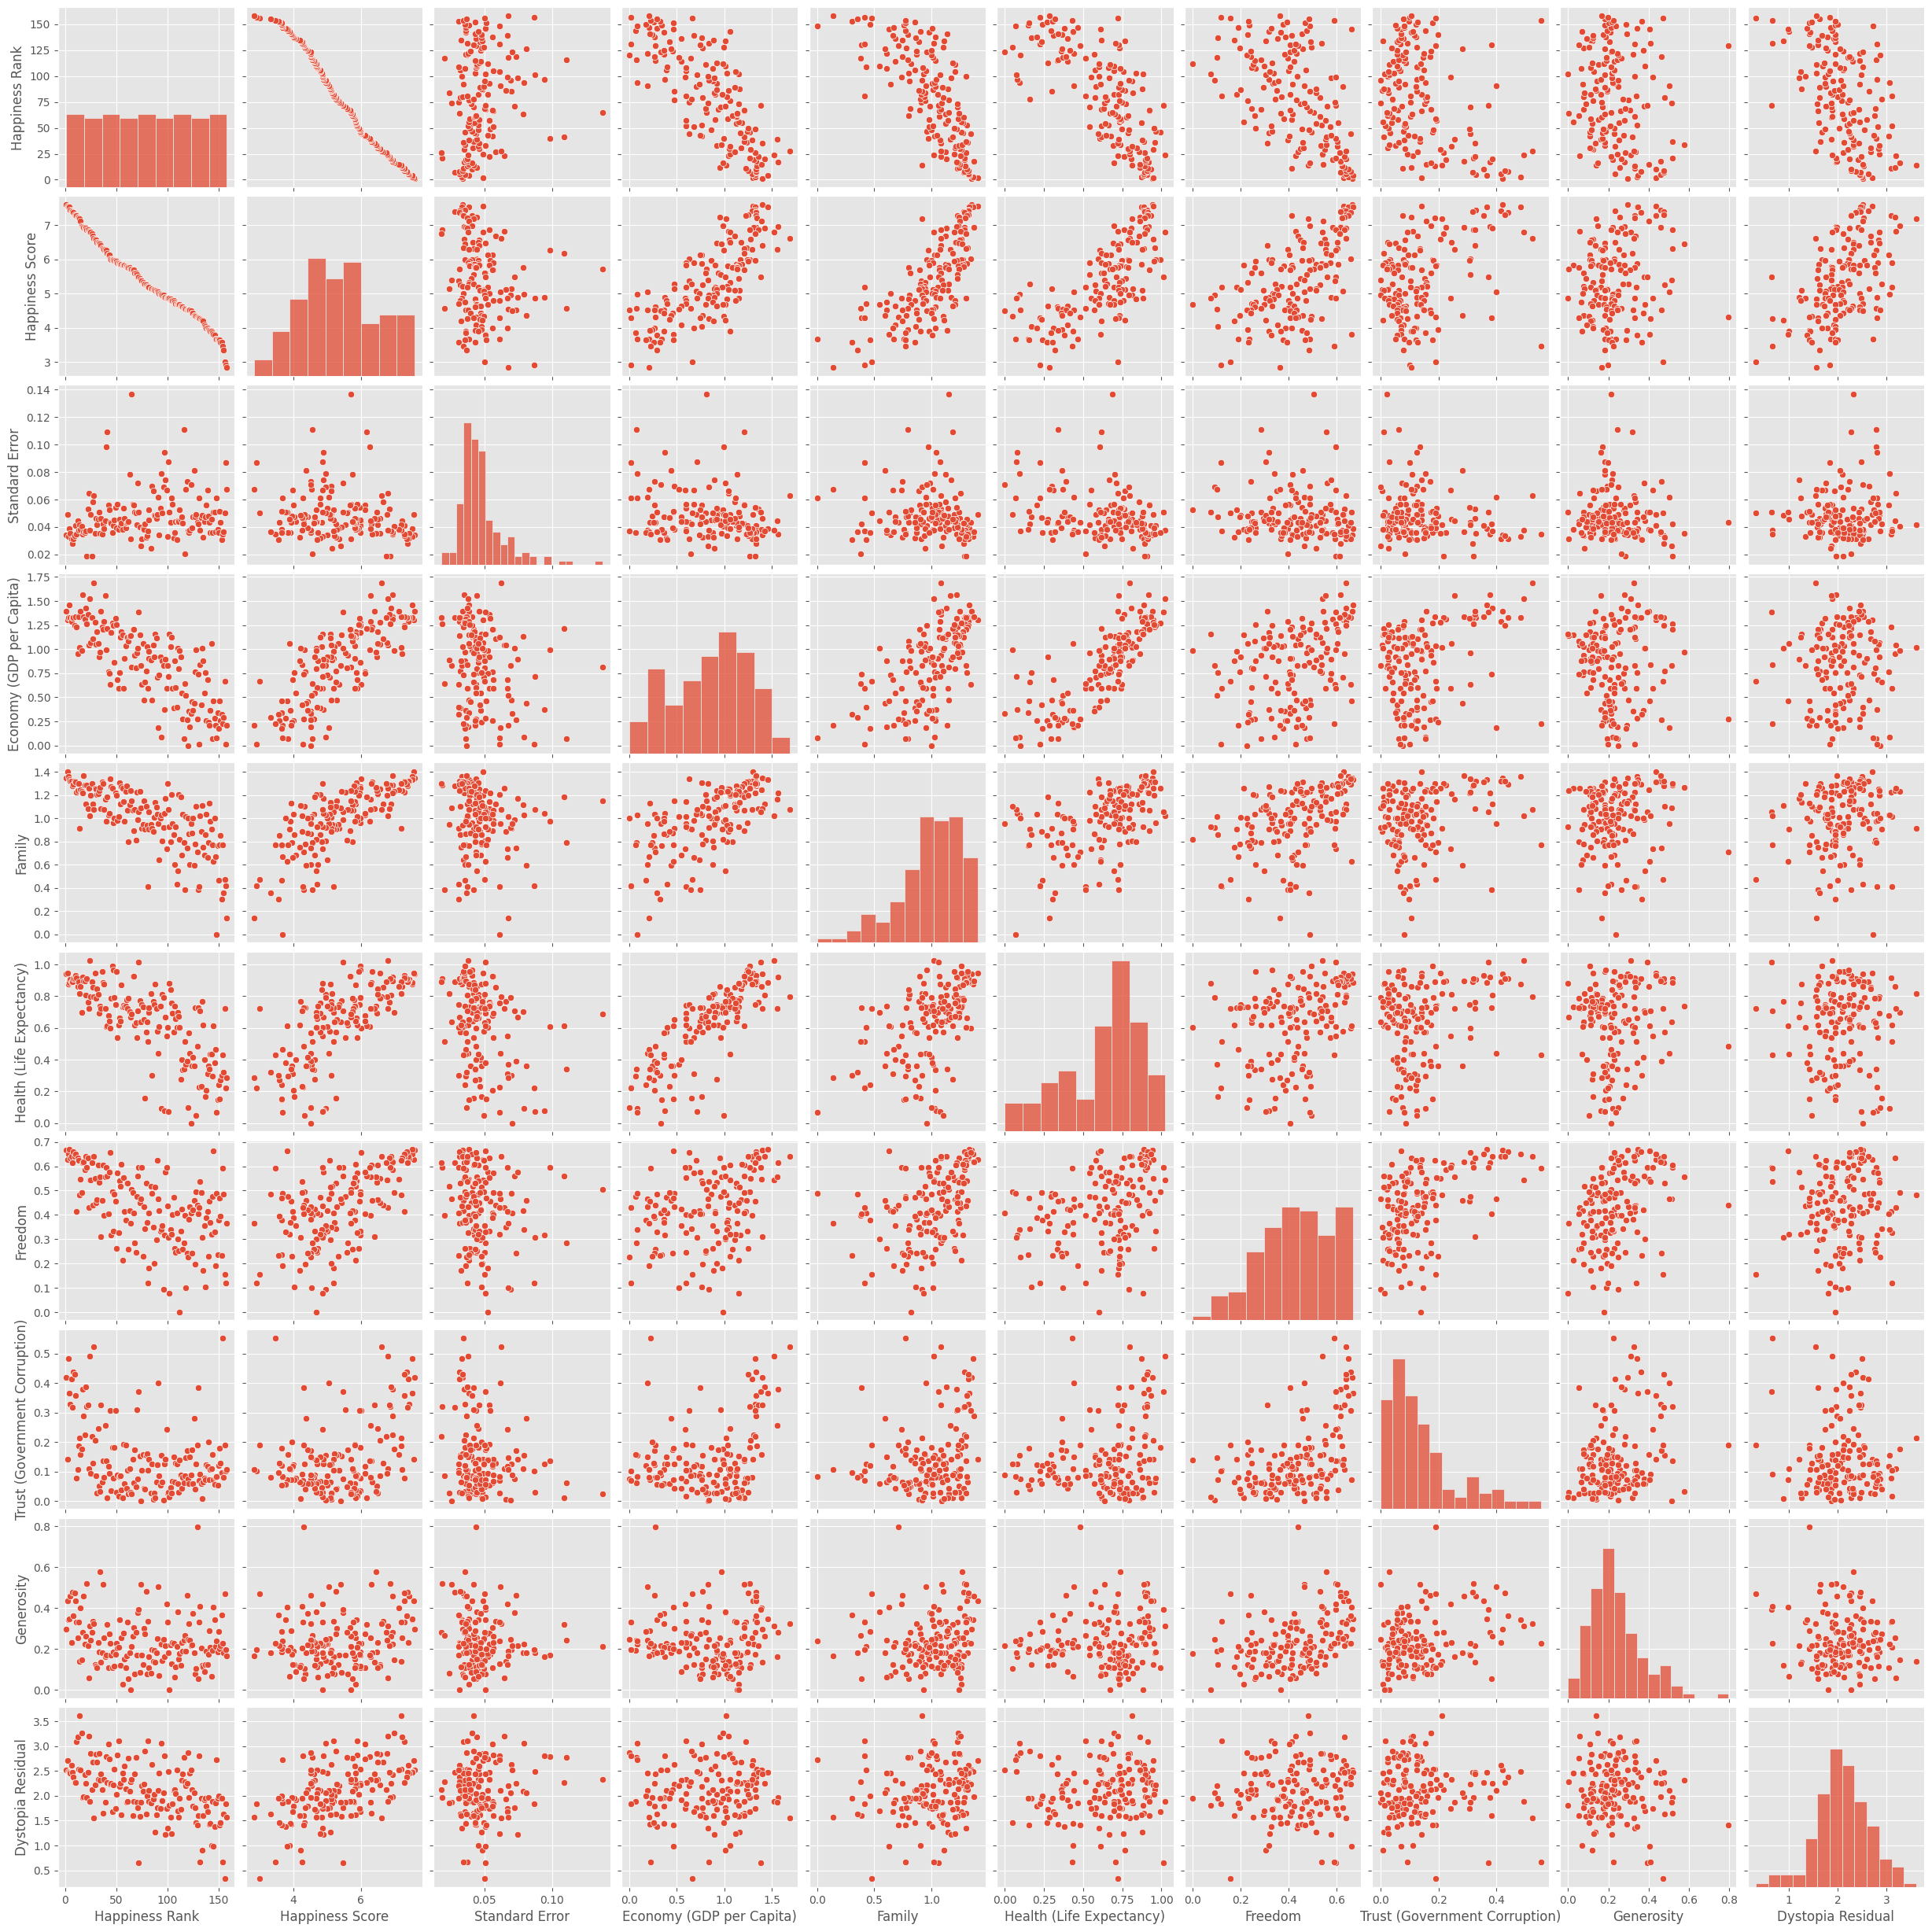

In [99]:
# Visualize relationships between all numerical columns in the dataset.
sns.pairplot(numeric_df)

In [ ]:
#Strong Positive Correlations with Happiness Score:

#Economy (GDP per Capita) (0.78): Countries with higher GDP per capita generally have higher happiness scores, indicating economic well-being plays a significant role in happiness.

#Family (0.74): Social support and strong family connections are closely tied to happiness levels.

#Health (Life Expectancy) (0.72): Health metrics strongly contribute to happiness, underlining the importance of well-being.

#Moderate Positive Correlations:

#Freedom (0.57): People's perceived freedom in life choices moderately impacts happiness.

#Trust (Government Corruption) (0.4): Although weaker, trust in government and reduced corruption show a positive association with happiness.

#Weak Correlation:

#Generosity (0.18): This suggests that while generosity has a role, it might not be as influential as economic or health factors.

#Dystopia Residual (0.53): This component might act as a baseline for how other factors influence happiness but shows a moderate effect.